In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
%matplotlib inline


In [ ]:
# Convert to DataFrame
df = pd.read_csv('Breast_cancer_data.csv')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [ ]:
# Separate features and target variable
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
print("Matrix of features", X, sep='\n')
print("--------------------------------------------------")
print("Target Variable", y, sep='\n')

Matrix of features
[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01]
 ...
 [1.660e+01 2.808e+01 1.083e+02 8.581e+02 8.455e-02]
 [2.060e+01 2.933e+01 1.401e+02 1.265e+03 1.178e-01]
 [7.760e+00 2.454e+01 4.792e+01 1.810e+02 5.263e-02]]
--------------------------------------------------
Target Variable
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 

We use the `cross_validate` function from the `Scikit-Learn` library's `model_selection` module.

The parameter `X` takes the matrix of features. The parameter `y` takes the target variable, which is the 0 or 1 representing benign or malignant tumor. The parameter scoring takes the metrics we want to use for evaluation. We pass a list containing metrics we want to use to check our model.

For this guide, we will use [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html), [precision](https://), [recall](https://), and [F1](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) score. These are metrics that are commonly used to evaluatethe performance of classification models.

Setting the return_train_score to True will give us the training results.



In [ ]:
from sklearn.model_selection import cross_validate
def cross_validation(model, X, y, cv=5):
  scoring = ['accuracy', 'precision', 'recall', 'f1']
  results = cross_validate(estimator=model,
                               X=X,
                               y=y,
                               cv=cv,
                               scoring=scoring,
                               return_train_score=True)
  return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
      }

The custom cross_validation function in the code above will perform 5-fold cross-validation.

In [ ]:
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        '''Function to plot a grouped bar chart showing the training and validation
          results of the ML model in each fold after applying K-fold cross-validation.

         Args:
            x_label: str,
                Name of the algorithm used for training e.g 'Decision Tree'

            y_label: str,
                Name of metric being visualized e.g 'Accuracy'
            plot_title: str,
                This is the title of the plot e.g 'Accuracy Plot'

            train_result: list, array
                This is the list containing either training precision, accuracy, or f1 score.

            val_result: list, array
                This is the list containing either validation precision, accuracy, or f1 score.

         Returns:
            The function returns a Grouped Barchart showing the training and validation result
            in each fold.
        '''
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='gray', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='purple', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

**Model training**
Now we can train our machine learning algorithm. We will use a decision tree algorithm. We import the DecisionTreeClassifier from the tree module of the Scikit-Learn library. We also invoke the cross_validation function we created earlier to perform 5-fold cross-validation.



In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(criterion="entropy",
                                     random_state=0)
decision_tree_result = cross_validation(decision_tree_model, X, y, 5)
print(decision_tree_result)

{'Training Accuracy scores': array([1., 1., 1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Training Precision scores': array([1., 1., 1., 1., 1.]), 'Mean Training Precision': 1.0, 'Training Recall scores': array([1., 1., 1., 1., 1.]), 'Mean Training Recall': 1.0, 'Training F1 scores': array([1., 1., 1., 1., 1.]), 'Mean Training F1 Score': 1.0, 'Validation Accuracy scores': array([0.83333333, 0.89473684, 0.92105263, 0.95614035, 0.89380531]), 'Mean Validation Accuracy': 89.981369352585, 'Validation Precision scores': array([0.85135135, 0.88311688, 0.92      , 0.94666667, 0.96825397]), 'Mean Validation Precision': 0.9138777738777739, 'Validation Recall scores': array([0.88732394, 0.95774648, 0.95833333, 0.98611111, 0.85915493]), 'Mean Validation Recall': 0.9297339593114241, 'Validation F1 scores': array([0.86896552, 0.91891892, 0.93877551, 0.96598639, 0.91044776]), 'Mean Validation F1 Score': 0.9206188204232466}


To understand the results better, we can visualize them. We use the plot_result function we created earlier. We start by visualizing the training accuracy and validation accuracy in each fold.

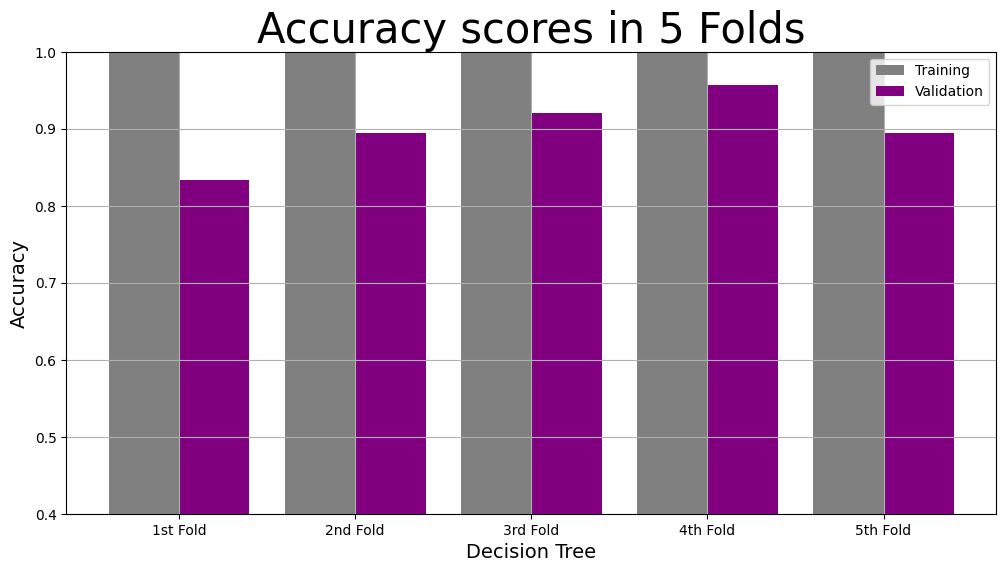

In [ ]:
 #Plot Accuracy Result
model_name = "Decision Tree"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            decision_tree_result["Training Accuracy scores"],
            decision_tree_result["Validation Accuracy scores"])

We can also visualize the training precision and validation precision in each fold.

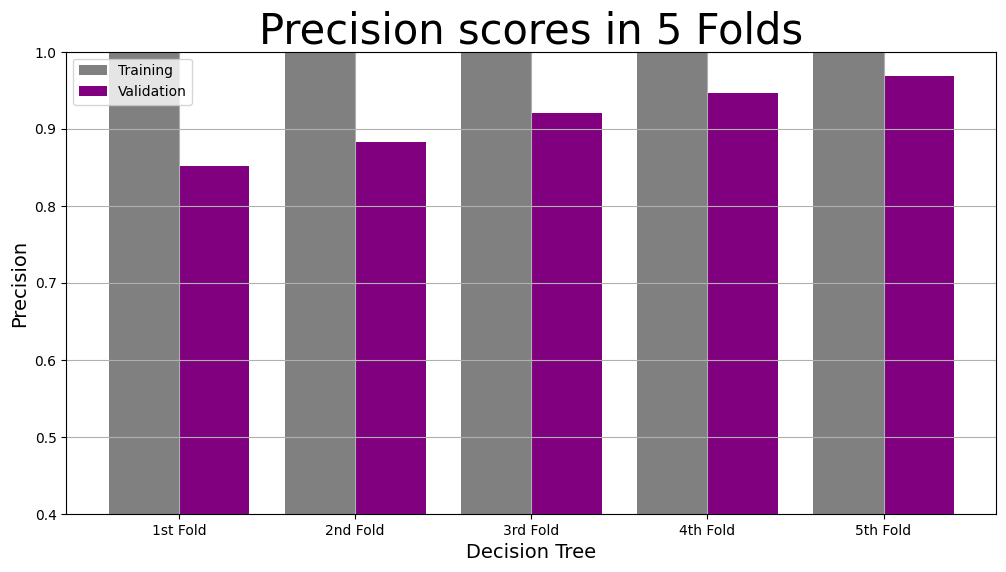

In [ ]:
plot_result(model_name,
            "Precision",
            "Precision scores in 5 Folds",
            decision_tree_result["Training Precision scores"],
            decision_tree_result["Validation Precision scores"])

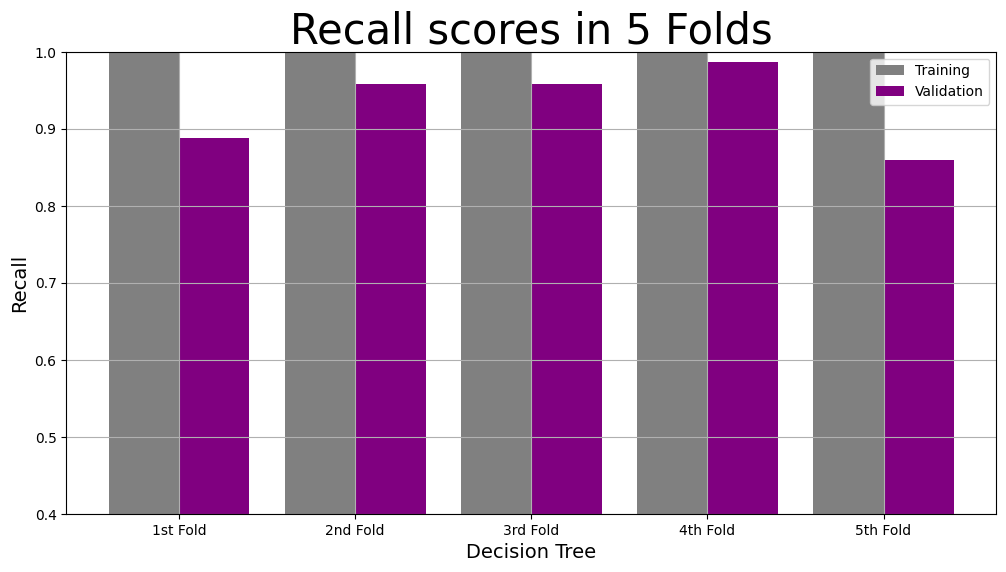

In [ ]:
# Plot Recall Result
plot_result(model_name,
            "Recall",
            "Recall scores in 5 Folds",
            decision_tree_result["Training Recall scores"],
            decision_tree_result["Validation Recall scores"])

Finally, we visualize the training f1 score and validation f1 score in each fold.

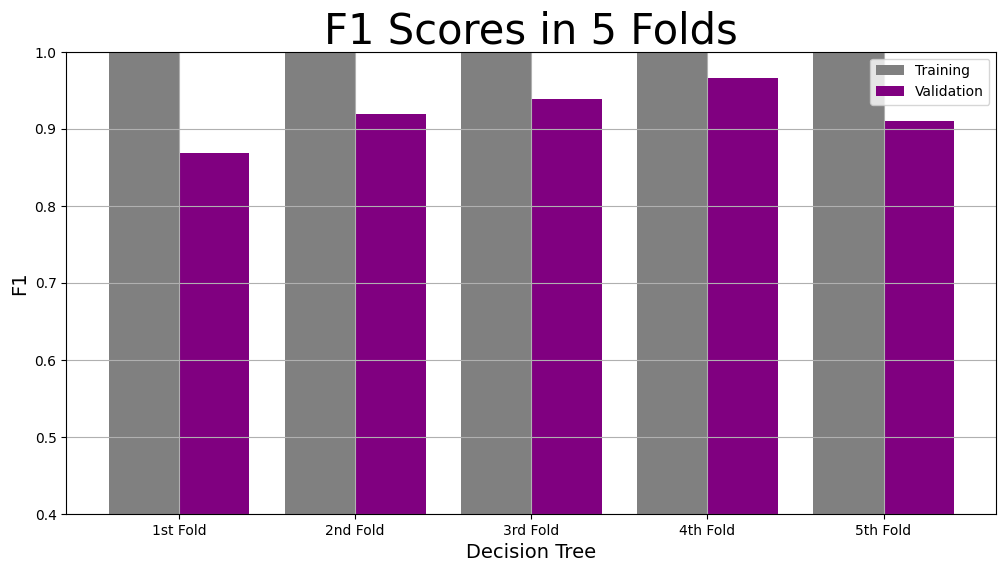

In [ ]:
# Plot F1-Score Result
plot_result(model_name,
            "F1",
            "F1 Scores in 5 Folds",
            decision_tree_result["Training F1 scores"],
            decision_tree_result["Validation F1 scores"])

The visualizations show that the training accuracy, precision, recall, and f1 scores in each fold are 100%. But the validation accuracy, precision, recall and f1 scores are not as high. We call this over-fitting.

**Hyper-parameter tuning**

To improve this, we will experiment with the classifier and we will adjust the `min_samples_split` hyper-parameter in the decision tree algorithm. It will fix the over-fitting problem. The default value of the min_samples_split parameter is 2. We increase the value to 5.

In [ ]:
decision_tree_model_2 = DecisionTreeClassifier(criterion="entropy",
                                               min_samples_split=5,
                                               random_state=0)
decision_tree_result_2 = cross_validation(decision_tree_model_2, X, y, 5)
print(decision_tree_result_2)

{'Training Accuracy scores': array([0.98681319, 0.98681319, 0.99120879, 0.99120879, 0.98903509]), 'Mean Training Accuracy': 98.90158087526508, 'Training Precision scores': array([0.9964539 , 0.9964539 , 0.99646643, 1.        , 0.99646643]), 'Mean Training Precision': 0.9971681327218505, 'Training Recall scores': array([0.98251748, 0.98251748, 0.98947368, 0.98596491, 0.98601399]), 'Mean Training Recall': 0.9852975095080359, 'Training F1 scores': array([0.98943662, 0.98943662, 0.99295775, 0.99293286, 0.99121265]), 'Mean Training F1 Score': 0.9911953003769728, 'Validation Accuracy scores': array([0.84210526, 0.92105263, 0.92982456, 0.93859649, 0.88495575]), 'Mean Validation Accuracy': 90.33069399161622, 'Validation Precision scores': array([0.8630137 , 0.91891892, 0.93243243, 0.93333333, 0.98333333]), 'Mean Validation Precision': 0.926206343329631, 'Validation Recall scores': array([0.88732394, 0.95774648, 0.95833333, 0.97222222, 0.83098592]), 'Mean Validation Recall': 0.9213223787167448,

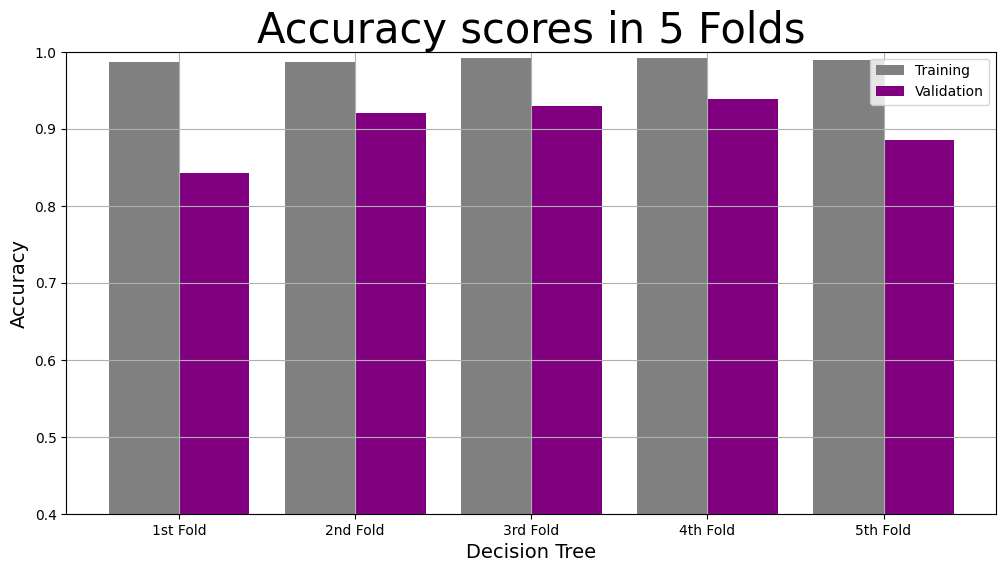

In [ ]:
# Plot Accuracy Result
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            decision_tree_result_2["Training Accuracy scores"],
            decision_tree_result_2["Validation Accuracy scores"])

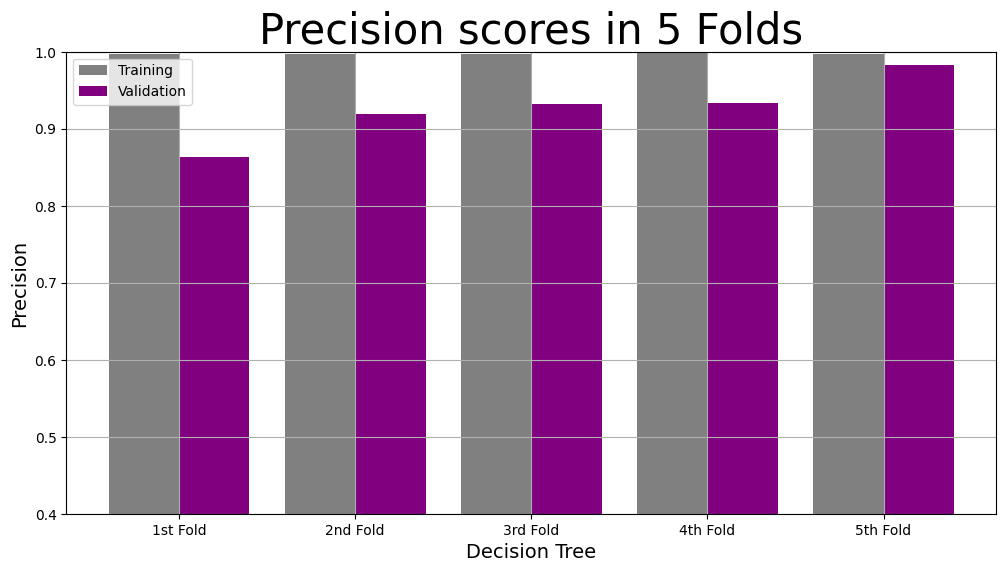

In [ ]:
# Plot Precision Result
plot_result(model_name,
            "Precision",
            "Precision scores in 5 Folds",
            decision_tree_result_2["Training Precision scores"],
            decision_tree_result_2["Validation Precision scores"])

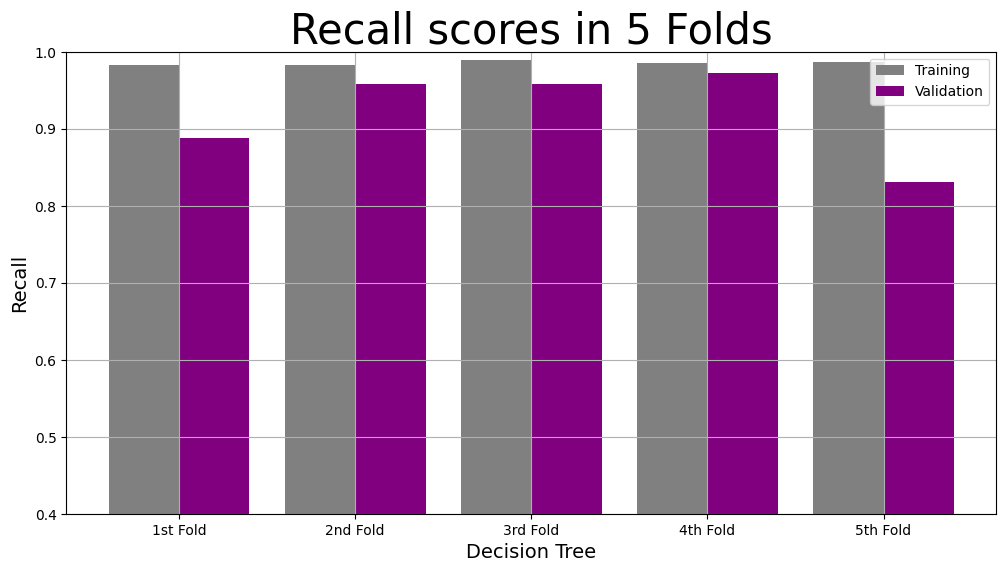

In [ ]:
# Plot Recall Result
plot_result(model_name,
            "Recall",
            "Recall scores in 5 Folds",
            decision_tree_result_2["Training Recall scores"],
            decision_tree_result_2["Validation Recall scores"])

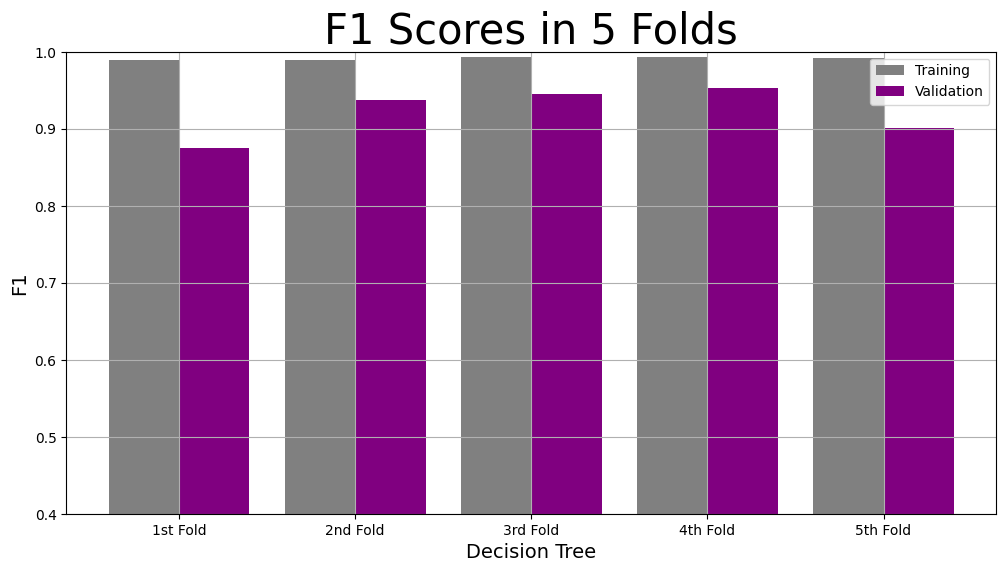

In [ ]:
# Plot F1-Score Result
plot_result(model_name,
            "F1",
            "F1 Scores in 5 Folds",
            decision_tree_result_2["Training F1 scores"],
            decision_tree_result_2["Validation F1 scores"])

### **Exercise : Hyperparameter Tuning using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)**

`GridSearchCV` performs an exhaustive search over a specified parameter grid.



* Using the breast_cabcer_data.csv, split the dataset into training and testing sets and use GridSearchCV to find the best hyperparameters for the `DecisionTreeClassifier`. Tune the parameters:
* `max_depth`: [None, 5, 10, 15, 20]
* `min_samples_split`: [2, 5, 10]
* `min_samples_leaf`: [1, 2, 4]

In [ ]:
# Write your code here
from sklearn.model_selection import train_test_split

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [ ]:
# Print the best hyperparameters and the corresponding accuracy
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score:.2f}")

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Score: 0.90
